In [1]:
#Setup for opening datasets
using BenchmarkTools
using DataFrames
using DelimitedFiles #reads data from text files
using CSV #Recommended method
using XLSX
using Downloads #Reads data from web

In [3]:
#Get some data online
P = Downloads.download("https://raw.githubusercontent.com/nassarhuda/easy_data/master/programming_languages.csv",
    "programming_languages.csv")
P

"programming_languages.csv"

In [4]:
C = CSV.read("programming_languages.csv", DataFrame); #Equivalent to pd.read_csv() on Python

In [5]:
C

Row,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [6]:
C[1:10,:] #Same as C.head(10) on Python

Row,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [2]:
#Setup for Statistics
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

In [3]:
D = dataset("datasets","faithful")
@show names(D)
D

names(D) = ["Eruptions", "Waiting"]


Row,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [4]:
describe(D) #The same as df.describe() on Python

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


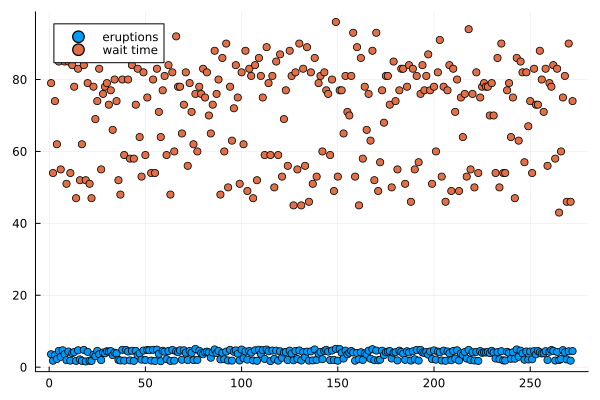

In [5]:
eruptions = D[!,:Eruptions]
scatter(eruptions,label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime,label="wait time")

## Statistics Plots
We need them. Regular Scatter plots don't tell us much.

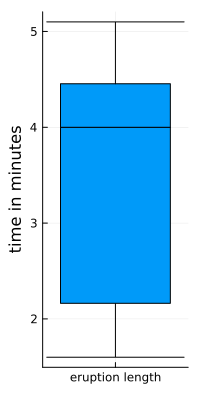

In [6]:
#Boxplot in Julia
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

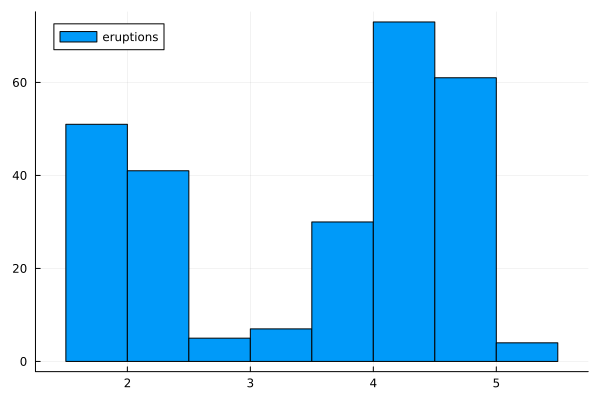

In [8]:
#Histograms of Eruptions
histogram(eruptions,label="eruptions", bins=12)

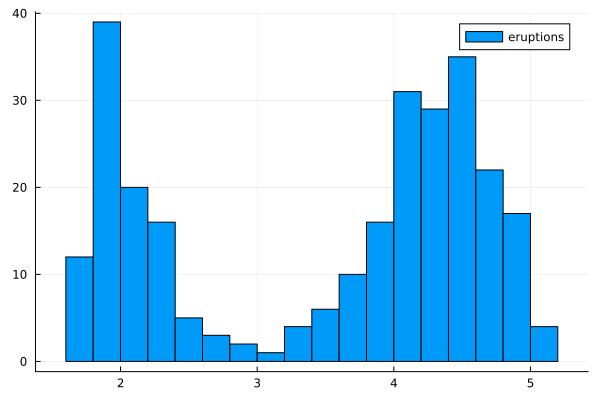

In [9]:
histogram(eruptions,bins=:sqrt,label="eruptions") #Way to auto select no of bins

In [10]:
#Kernel Density Estimate Function
p=kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604056456e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864678623e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

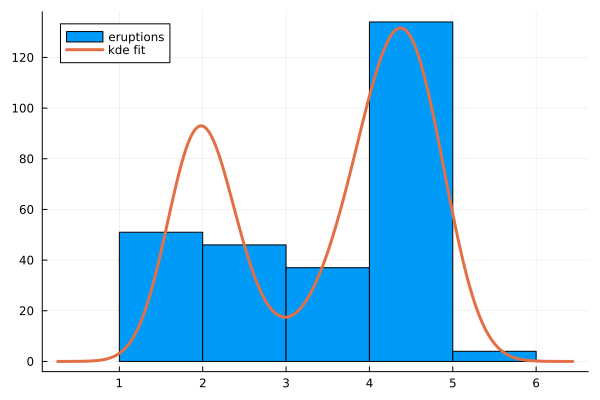

In [12]:
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit",) # nb of elements*bin width

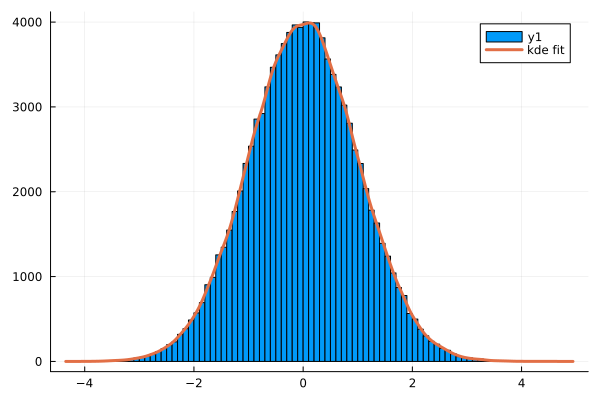

In [13]:
#Verify that Normal Distrubution Generates a Bell Curve
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

It does.

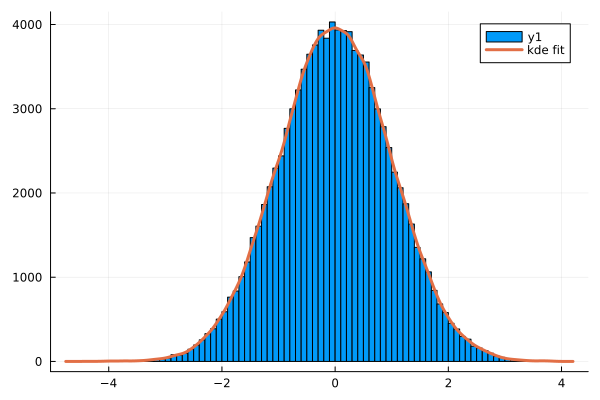

In [14]:
#Testing Probability Distributions


d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

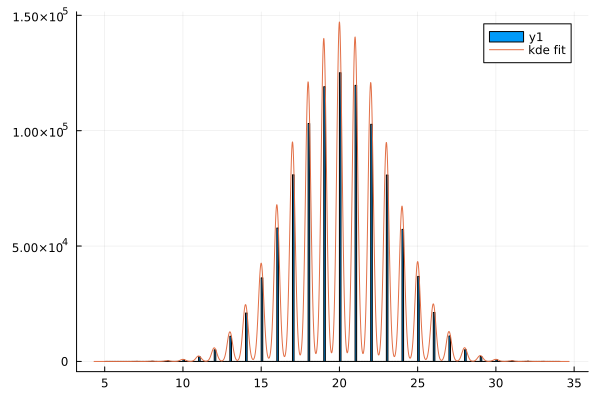

In [15]:
b = Binomial(40)
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

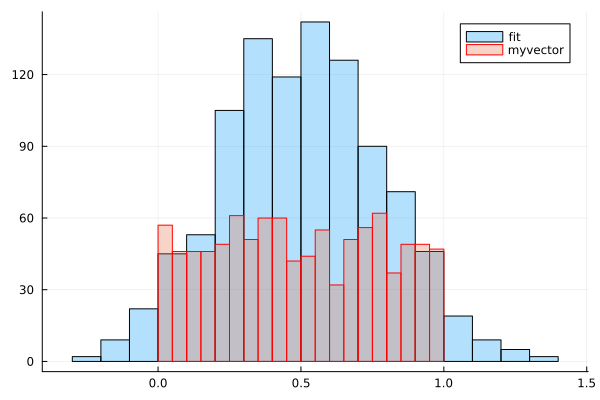

In [16]:
#Fit numbers to a distribution
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

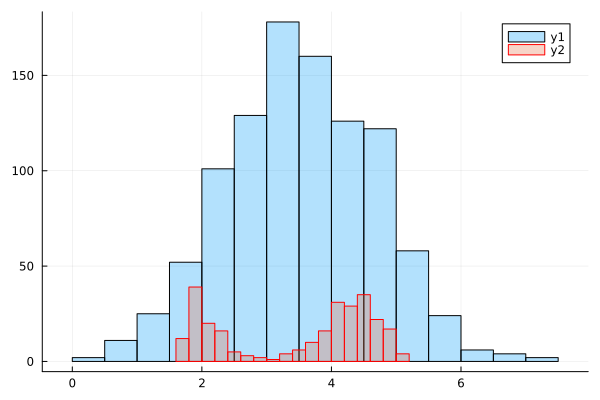

In [17]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

In [18]:
#Hypothesis Testing
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.00845532
    95% confidence interval: (-0.05268, 0.06959)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7861

Details:
    number of observations:   1000
    t-statistic:              0.27140387392641396
    degrees of freedom:       999
    empirical standard error: 0.03115402373710453


In [19]:
#AUC and Confusion Matrix
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)

2×2 Matrix{Int64}:
 5  2
 1  0

In [20]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred) #compute ROC AUC
recall(ROC)
precision(ROC)

0.8333333333333334

In [4]:
#Packages used for Dimension Reduction
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [5]:
C = DataFrame(VegaDatasets.dataset("cars")) #Prebuilt dataset

Row,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA
6,ford galaxie 500,15.0,8,429.0,198,4341,10.0,1970-01-01,USA
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,1970-01-01,USA
8,plymouth fury iii,14.0,8,440.0,215,4312,8.5,1970-01-01,USA
9,pontiac catalina,14.0,8,455.0,225,4425,10.0,1970-01-01,USA


In [6]:
dropmissing!(C) #like .dropna() for Pandas
M = Matrix(C[:,2:7])
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [7]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

In [8]:
#Method 1: PCA
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

In [9]:
# each car is now a column, PCA takes features - by - samples matrix
data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

In [10]:
#Fit the model, we want 2 dimensions
p = fit(PCA,data',maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333575)

Pattern matrix (unstandardized loadings):
───────────────────────
         PC1        PC2
───────────────────────
1  -0.873037  -0.20899
2   0.942277   0.126601
3   0.97054    0.092613
4   0.94995   -0.141833
5   0.941156   0.244211
6  -0.638795   0.761967
───────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.78827   0.728631
Variance explained         0.798044  0.121439
Cumulative variance        0.798044  0.919483
Proportion explained       0.867927  0.132073
Cumulative proportion      0.867927  1.0
─────────────────────────────────────────────

In [11]:
#Projection Matrix
P = projection(p)

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

In [12]:
#Apply Projection matrix to a car
P'*(data[1,:]-mean(p))

2-element Vector{Float64}:
 -2.323001696522692
 -0.5713519642644695

In [13]:
#Transform the data
Yte = MultivariateStats.transform(p, data') #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [14]:
# reconstruct testing observations (approximately) - back to 6 dimensions
Xr = reconstruct(p, Yte)

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [15]:
norm(Xr-data') # this won't be zero

13.743841055569009

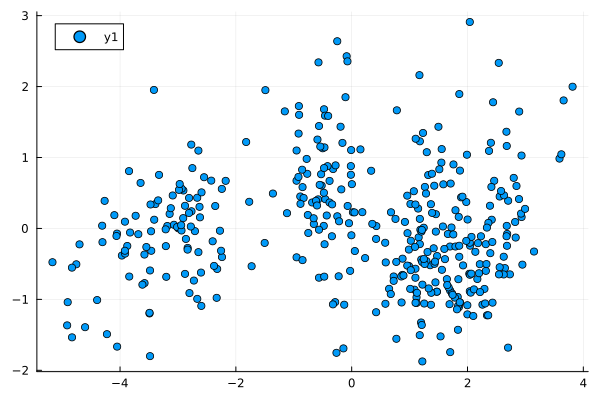

In [16]:
Plots.scatter(Yte[1,:],Yte[2,:])

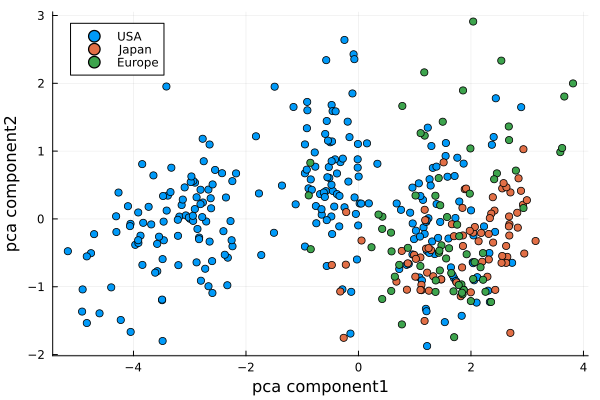

In [17]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")

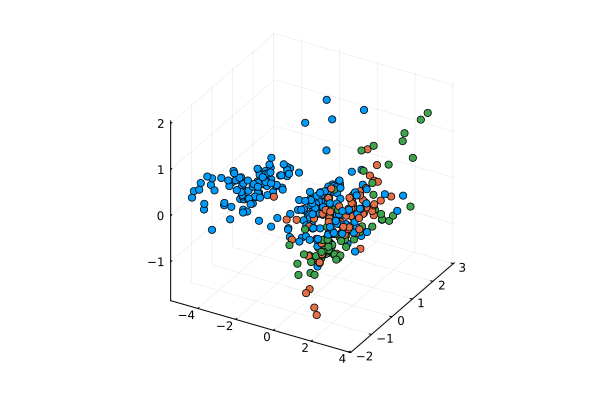

In [18]:
p = fit(PCA,data',maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids,legend=false)

#We want a 3D Plot - use Mackie

In [21]:
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)

FigureAxisPlot()

┌ Info: Running `conda install -y -c conda-forge 'libstdcxx-ng>=3.4,<11.4'` in root environment
└ @ Conda /home/joseph/.julia/packages/Conda/x2UxR/src/Conda.jl:127


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/joseph/.julia/conda/3

  added / updated specs:
    - libstdcxx-ng[version='>=3.4,<11.4']


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |  py310hff52083_0         914 KB  conda-forge
    libstdcxx-ng-11.3.0        |      h239ccf8_19         4.2 MB  conda-forge
    numpy-1.22.3               |  py310h4ef5377_2         6.8 MB  conda-forge
    pluggy-1.0.0               |     pyhd8ed1ab_5          16 KB  conda-forge
    ruamel.yaml-0.17.21        |  py310h5764c6d_2         175 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |  py310h1fa729e_1         132 KB  conda-forge
    ------------------------------------------------------------
                                         

/home/joseph/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/joseph/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


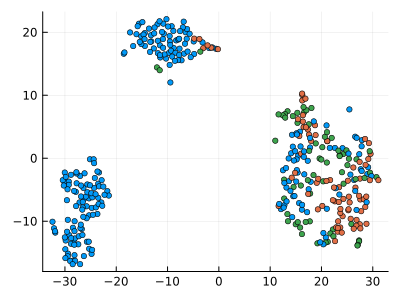

In [28]:
#Method 2: t-SNE
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)

In [29]:
#Method 3: UMAP
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 7.23019  6.74579  7.01923  7.09029  7.07565  …  -5.01581  -7.51098  -7.64233
 2.30321  2.45344  3.01821  2.43328  2.98662      1.91918  -3.8128   -3.64285

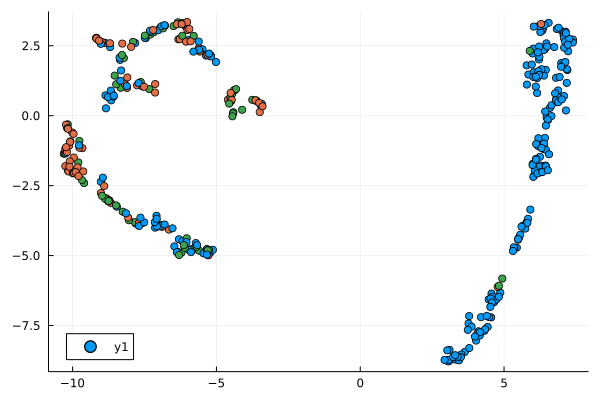

In [30]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

In [31]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
 -5.35849  -6.86761   -5.04997  -5.19633  …   7.95091     4.92423   4.92844
  3.55463   0.792286   2.9493    2.97285     -0.0902582  -0.34637  -0.650818

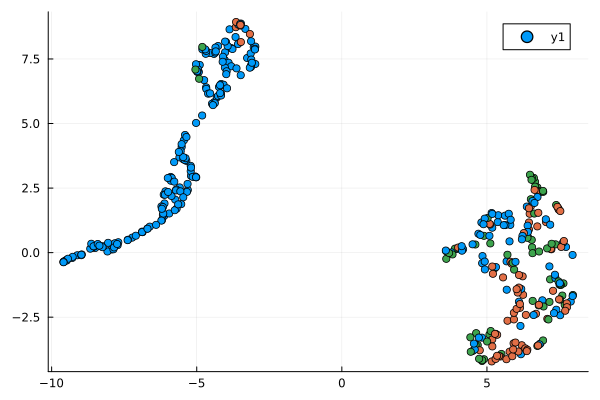

In [32]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)